In [1]:
# !pip install pytrends
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta
from pytrends.request import TrendReq
import time
import pandas as pd
import matplotlib
import gtrend   

plt.style.use('seaborn-darkgrid')
matplotlib.rcParams['font.family'] = ['Heiti TC']
def rmax(maxrow: int=50):
    pd.set_option('display.max_rows', maxrow)

def cmax(maxcol: int=50):
    pd.set_option('display.max_columns', maxcol)

In [101]:
pytrend = TrendReq(hl='en-US')
keyword = 'Ethereum'
start = '2015-08-08'
end = '2021-07-06'
geo=''
cat=0
gprop=''

In [102]:
overlapping = gtrend.get_daily_trend(pytrend, keyword, start, end, geo=geo, cat=cat, gprop=gprop, verbose=True, tz=0)

Fetching 'Ethereum' for period:2020-10-10 2021-07-06
Fetching 'Ethereum' for period:2020-04-24 2021-01-18
Normalize by overlapping period:2020-10-10 2021-01-18
Fetching 'Ethereum' for period:2019-11-07 2020-08-02
Normalize by overlapping period:2020-04-24 2020-08-02
Fetching 'Ethereum' for period:2019-05-22 2020-02-15
Normalize by overlapping period:2019-11-07 2020-02-15
Fetching 'Ethereum' for period:2018-12-04 2019-08-30
Normalize by overlapping period:2019-05-22 2019-08-30
Fetching 'Ethereum' for period:2018-06-18 2019-03-14
Normalize by overlapping period:2018-12-04 2019-03-14
Fetching 'Ethereum' for period:2017-12-31 2018-09-26
Normalize by overlapping period:2018-06-18 2018-09-26
Fetching 'Ethereum' for period:2017-07-15 2018-04-10
Normalize by overlapping period:2017-12-31 2018-04-10
Fetching 'Ethereum' for period:2017-01-27 2017-10-23
Normalize by overlapping period:2017-07-15 2017-10-23
Fetching 'Ethereum' for period:2016-08-11 2017-05-07
Normalize by overlapping period:2017-0

<AxesSubplot:xlabel='date'>

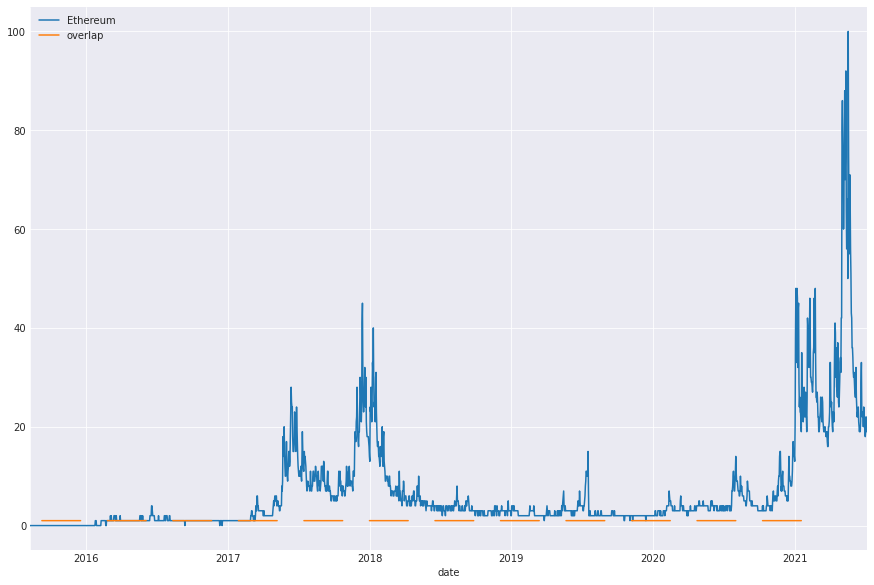

In [103]:
overlapping.plot(figsize=(15,10))

In [104]:
from pytrends import dailydata

start_d = datetime.strptime(start, '%Y-%m-%d')
end_d = datetime.strptime(end, '%Y-%m-%d')
s_year = start_d.year
s_mon = start_d.month
e_year = end_d.year
e_mon = end_d.month

dailydata = dailydata.get_daily_data(word= keyword,
                 start_year= s_year,
                 start_mon= s_mon,
                 stop_year= e_year,
                 stop_mon= e_mon,
                 geo= geo,
                 verbose= False,
                 wait_time = 1.0)

Index(['Ethereum_unscaled', 'Ethereum_monthly', 'isPartial', 'scale',
       'Ethereum'],
      dtype='object')


<AxesSubplot:xlabel='date'>

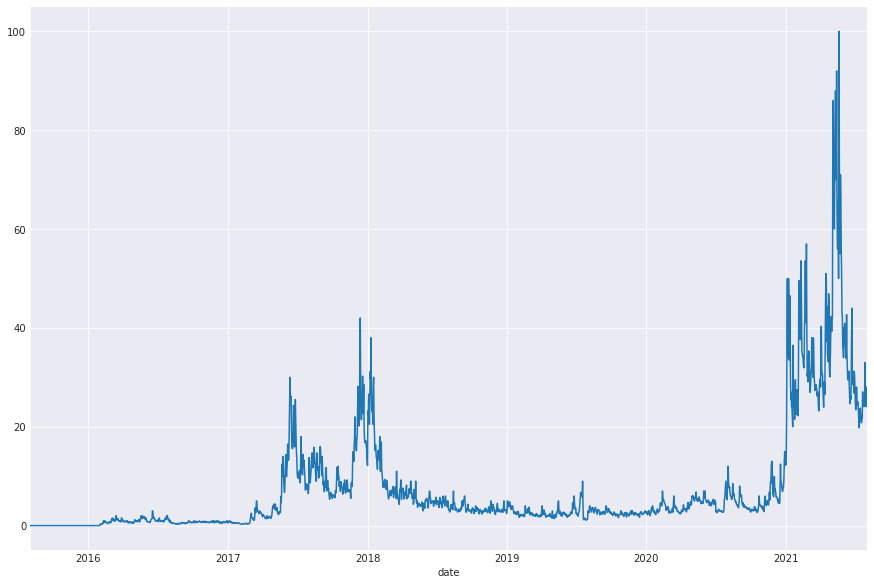

In [105]:
print(dailydata.columns)
dailydata[f'{keyword}'].plot(figsize=(15,10))

In [106]:
tf = start_d.strftime('%Y-%m-%d')+' '+end_d.strftime('%Y-%m-%d')
pytrend.build_payload(kw_list=[keyword], cat=cat, geo=geo, gprop=gprop, timeframe=tf)
week = pytrend.interest_over_time()
week_interp = week.resample('D').mean()
week_interp[f'{keyword}'] = week_interp[f'{keyword}'].interpolate()

In [107]:
week_interp.drop(columns='isPartial', inplace=True)

<AxesSubplot:xlabel='date'>

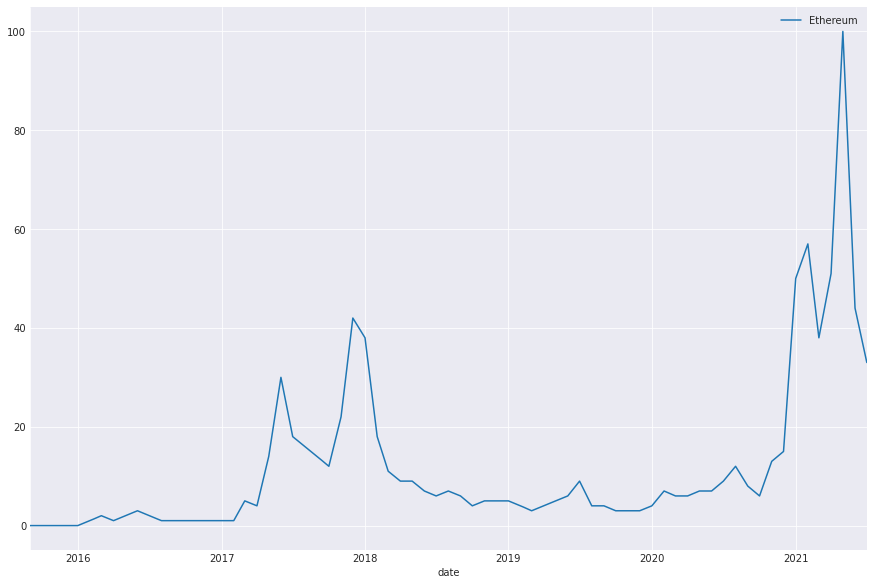

In [108]:
week_interp.plot(figsize=(15,10))

In [109]:
overlapping.loc[:,keyword]

date
2015-08-08     0.0
2015-08-09     0.0
2015-08-10     0.0
2015-08-11     0.0
2015-08-12     0.0
              ... 
2021-07-02    18.0
2021-07-03    19.0
2021-07-04    22.0
2021-07-05    20.0
2021-07-06    19.0
Freq: D, Name: Ethereum, Length: 2160, dtype: float64

In [110]:
overlapping.columns

Index(['Ethereum', 'overlap'], dtype='object')

In [111]:
combined = pd.concat([overlapping, dailydata.loc[:,keyword], week_interp], axis=1)

In [112]:
combined.columns = ['overlapping method', 'overlap period', 'dailydata method', 'weekly data']

In [113]:
combined.tail(20)

,overlapping method,overlap period,dailydata method,weekly data
date,,,,
2021-07-12,NaN,NaN,21.12,NaN
2021-07-13,NaN,NaN,23.43,NaN
2021-07-14,NaN,NaN,23.76,NaN
2021-07-15,NaN,NaN,22.11,NaN
2021-07-16,NaN,NaN,21.45,NaN
2021-07-17,NaN,NaN,20.79,NaN
2021-07-18,NaN,NaN,21.45,NaN
2021-07-19,NaN,NaN,21.78,NaN
2021-07-20,NaN,NaN,27.06,NaN


In [114]:
combined.columns = ['overlapping method','overlap period', 'dailydata method', 'weekly data']
combined = combined.resample('D').mean()

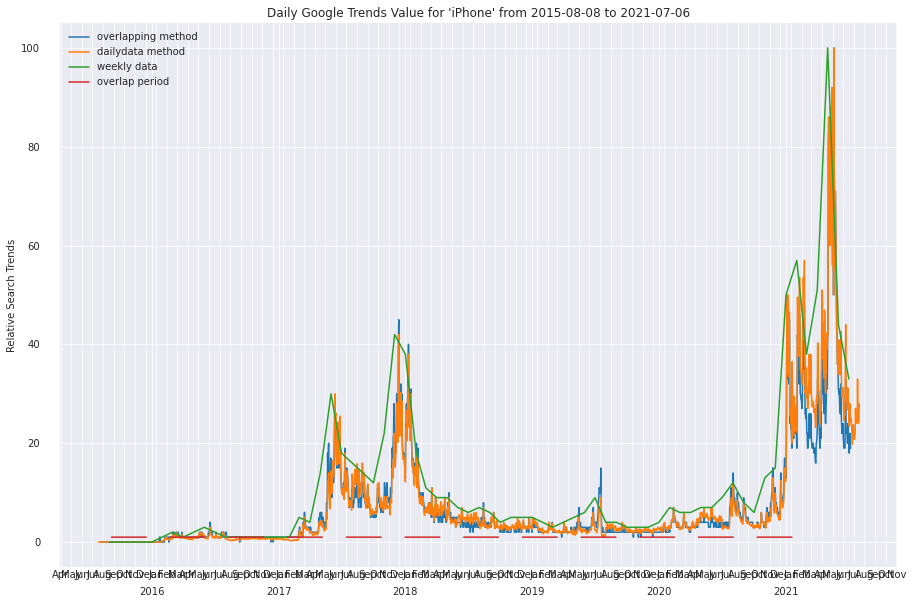

In [115]:
import matplotlib.dates as mdates
from cycler import cycler
from matplotlib.cm import get_cmap

combined2 = combined.iloc[:, [0,2,3,1]]
combined2.index = [pd.to_datetime(date, format='%Y-%m-%d').date() for date in combined2.index]
# c = ['royalblue', 'darkorange', 'limegreen', 'salmon']
# colors = plt.cm.Paired(np.linspace(0,1,4)) # This returns RGBA; convert:
c = []
for i in range(0,4):
    c.append(matplotlib.colors.rgb2hex(plt.cm.tab10(i)))
ax = combined2.plot(figsize=(15,10), color=c)
# set line colors
# c = plt.cm.hot(np.linspace(0,1,4))
# ax.set_prop_cycle(cycler('color', c))
# ax.set_prop_cycle(color=colors)
# ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,30)))
# set monthly locator
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

ax.tick_params(direction='out', pad=20)
# set font and rotation for date tick labels
# plt.gcf().autofmt_xdate()
ax.xaxis.grid(True, which='minor')

plt.ylabel('Relative Search Trends')
# plt.xlabel('Date')
plt.title('Daily Google Trends Value for \'iPhone\' from '+start+' to '+end)
# plt.set_cmap('Pastel2')

plt.show()

In [116]:
combined.tail(20)

,overlapping method,overlap period,dailydata method,weekly data
date,,,,
2021-07-12,NaN,NaN,21.12,NaN
2021-07-13,NaN,NaN,23.43,NaN
2021-07-14,NaN,NaN,23.76,NaN
2021-07-15,NaN,NaN,22.11,NaN
2021-07-16,NaN,NaN,21.45,NaN
2021-07-17,NaN,NaN,20.79,NaN
2021-07-18,NaN,NaN,21.45,NaN
2021-07-19,NaN,NaN,21.78,NaN
2021-07-20,NaN,NaN,27.06,NaN


In [117]:
p_start = '2017-05-01'
p_end = '2017-12-31'
# p_start_d = datetime.strptime(p_start, '%Y-%m-%d')
# p_end_d = datetime.strptime(p_end, '%Y-%m-%d')
tf = p_start+' '+p_end
# geo='US'
pytrend.build_payload(kw_list=[keyword], cat=cat, geo=geo, gprop=gprop, timeframe=tf)
daily_real = pytrend.interest_over_time()

In [118]:
combined_period = combined.loc[p_start:p_end]
combined_period  = pd.concat([combined_period,daily_real], axis=1)
combined_period.drop(columns=['isPartial','overlap period'], inplace=True)
combined_period.columns = ['overlapping method', 'dailydata method', 'weekly data', 'original data']

In [119]:
c = []
for i in range(0,7):
    c.append(matplotlib.colors.rgb2hex(plt.cm.tab10(i)))
c

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

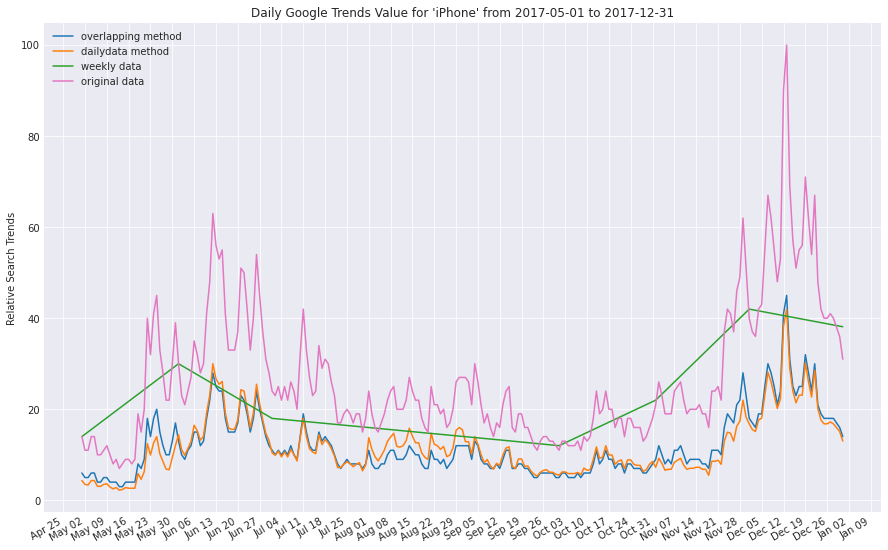

In [120]:
# combined_period.plot(figsize=(15,10))
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU

combined2 = combined_period.copy()
combined2.index = [pd.to_datetime(date, format='%Y-%m-%d').date() for date in combined2.index]
c = ['#1f77b4', '#ff7f0e', '#2ca02c', '#e377c2']
ax = combined2.plot(figsize=(15,10), color=c)
# set weekday locator
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=TU))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()

plt.ylabel('Relative Search Trends')
plt.xlabel(None)
plt.title('Daily Google Trends Value for \'iPhone\' from '+p_start+' to '+p_end)


plt.show()

In [121]:
begin = '2015-08-08'
finish = '2021-07-06'
combined_df = combined.loc[begin:finish]

In [122]:
combined_df = pd.DataFrame(combined_df['overlapping method'])

In [123]:
combined_df.to_csv('Ethereum_daily_data.csv')